# TomoPy with LPrec
Here is an example on how to use the log-polar based method for reconstruction with TomoPy.
<br>
Notebook source: https://tomopy.readthedocs.io/en/latest/ipynb/lprec.html

In [1]:
import dxchange
import matplotlib.pyplot as plt
import tomopy
import logging
logging.basicConfig(level=logging.INFO)

In [2]:
!echo $LD_LIBRARY_PATH

/bin/bash: /opt/conda/envs/maxiv-jup-conda-env-tomography-tomorec/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/opt/conda/envs/maxiv-jup-conda-env-tomography-tomorec/lib:/usr/local/cuda-12.2/lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:/.singularity.d/libs


In [3]:
proj, flat, dark, theta = dxchange.read_aps_32id(
    fname='/mxn/groups/kits/scisw/jupyterhub/data-for-validations/tomography/tomorec/tooth.h5',
    sino=(0, 2),
)
proj = tomopy.normalize(proj, flat, dark)
rot_center = 296
proj = tomopy.minus_log(proj)
proj[proj < 0] = 0  # no values less than zero with lprec

INFO:dxchange.reader:Data successfully imported: /mxn/groups/kits/scisw/jupyterhub/data-for-validations/tomography/tomorec/tooth.h5
INFO:dxchange.reader:Data successfully imported: /mxn/groups/kits/scisw/jupyterhub/data-for-validations/tomography/tomorec/tooth.h5
INFO:dxchange.reader:Data successfully imported: /mxn/groups/kits/scisw/jupyterhub/data-for-validations/tomography/tomorec/tooth.h5
INFO:dxchange.reader:Data successfully imported: /mxn/groups/kits/scisw/jupyterhub/data-for-validations/tomography/tomorec/tooth.h5


### Reconstruction using FBP method with the log-polar coordinates:
This first reconstruction in the notebook can be slower than the rest, due to some JIT compiling CUDA kernels.
<br>
2021-05-31 - Jason - Added parameter: ncore=1

Reconstructing 1 slice groups with 1 master threads...


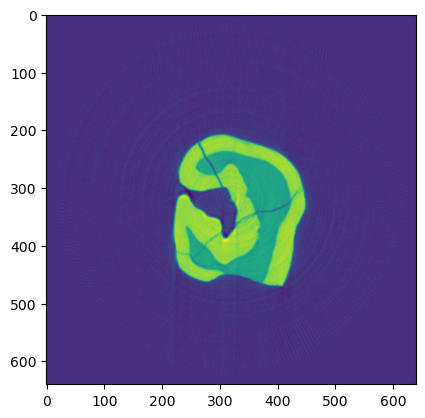

CPU times: user 6.34 s, sys: 512 ms, total: 6.86 s
Wall time: 3.7 s


In [4]:
%%time
recon = tomopy.recon(proj,
                     theta,
                     center=rot_center,
                     algorithm=tomopy.lprec,
                     lpmethod='fbp',
                     filter_name='parzen',
                     ncore=1)
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :, :])
plt.show()

### Reconstruction using the gradient descent method with the log-polar coordinates:
2021-06-01 - Jason - Added parameter: filter_name='none'

Reconstructing 1 slice groups with 1 master threads...


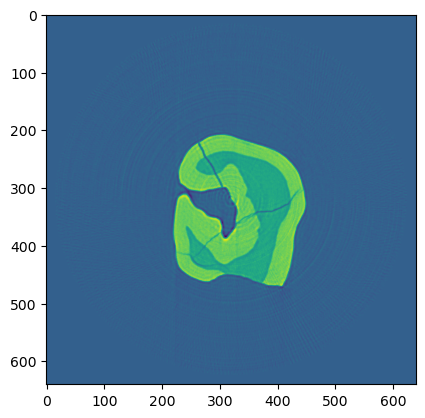

CPU times: user 8.7 s, sys: 623 ms, total: 9.32 s
Wall time: 3.09 s


In [5]:
%%time
recon = tomopy.recon(proj,
                     theta,
                     center=rot_center,
                     algorithm=tomopy.lprec,
                     lpmethod='grad',
                     filter_name='parzen',
                     ncore=1,
                     num_iter=64,
                     reg_par=-1)
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :, :])
plt.show()

### Reconstruction using the conjugate gradient method with the log-polar coordinates.
2021-06-01 - Jason - Added parameter: filter_name='none'

Reconstructing 1 slice groups with 1 master threads...


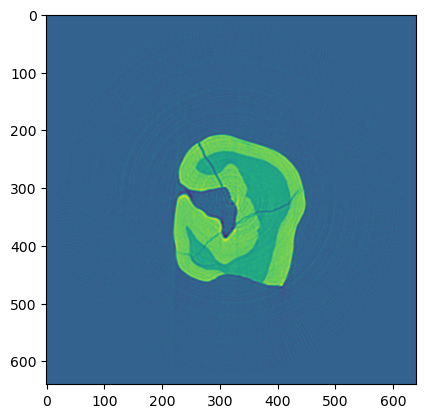

CPU times: user 9.19 s, sys: 488 ms, total: 9.68 s
Wall time: 3.4 s


In [6]:
%%time
recon = tomopy.recon(proj,
                     theta,
                     center=rot_center,
                     algorithm=tomopy.lprec,
                     lpmethod='cg',
                     filter_name='cosine',
                     ncore=1,
                     num_iter=16,
                     reg_par=-1)
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :, :])
plt.show()

### Reconstruction using the TV method with the log-polar coordinates. It gives piecewise constant reconstructions and can be used for denoising.
2021-06-01 - Jason - Added parameter: filter_name='none'

Reconstructing 1 slice groups with 1 master threads...


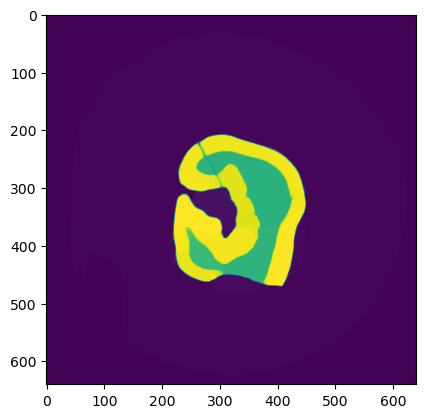

CPU times: user 11.2 s, sys: 2.07 s, total: 13.3 s
Wall time: 7.26 s


In [7]:
%%time
recon = tomopy.recon(proj,
                     theta,
                     center=rot_center,
                     algorithm=tomopy.lprec,
                     lpmethod='tv',
                     filter_name='cosine',
                     ncore=1,
                     num_iter=512,
                     reg_par=5e-4)
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :, :])
plt.show()

### Reconstruction using the TV-entropy method with the log-polar coordinates. It can be used for suppressing Poisson noise.
2021-06-01 - Jason - Added parameter: filter_name='none'

Reconstructing 1 slice groups with 1 master threads...


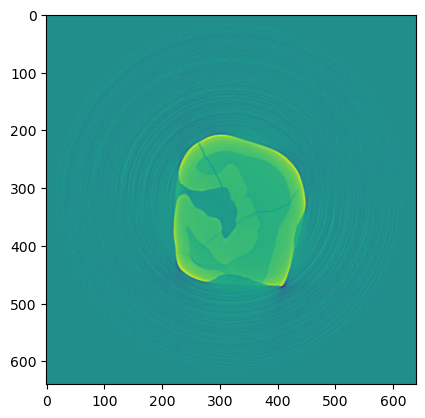

CPU times: user 13.6 s, sys: 445 ms, total: 14 s
Wall time: 7.64 s


In [8]:
%%time
recon = tomopy.recon(proj,
                     theta,
                     center=rot_center,
                     algorithm=tomopy.lprec,
                     lpmethod='tve',
                     filter_name='cosine',
                     ncore=1,
                     num_iter=512,
                     reg_par=2e-4)
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :, :])
plt.show()

### Reconstruction using the TV-l1 method with the log-polar coordinates. It can be used to remove structures of an image of a certain scale, and the regularization parameter 𝜆 can be used for scale selection.
2021-06-01 - Jason - Added parameter: filter_name='none'

Reconstructing 1 slice groups with 1 master threads...


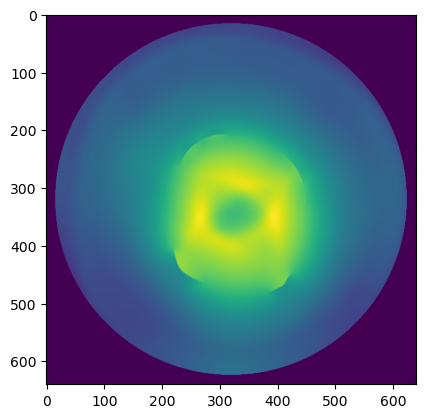

CPU times: user 12.2 s, sys: 390 ms, total: 12.6 s
Wall time: 6.54 s


In [9]:
%%time
recon = tomopy.recon(proj,
                     theta,
                     center=rot_center,
                     algorithm=tomopy.lprec,
                     lpmethod='tvl1',
                     filter_name='cosine',
                     ncore=1,
                     num_iter=512,
                     reg_par=3e-2)
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :, :])
plt.show()

### Reconstruction using the MLEM method with the log-polar coordinates.
2021-06-01 - Jason - Added parameter: filter_name='none'

Reconstructing 1 slice groups with 1 master threads...


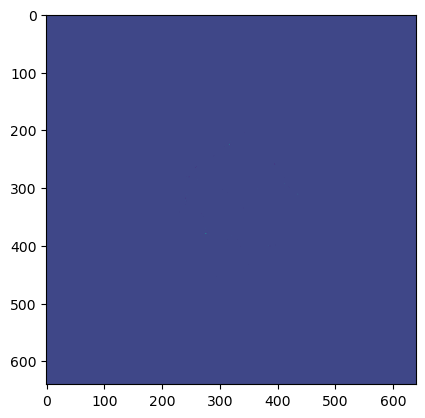

CPU times: user 8.27 s, sys: 592 ms, total: 8.87 s
Wall time: 3.14 s


In [10]:
%%time
recon = tomopy.recon(proj,
                     theta,
                     center=rot_center,
                     algorithm=tomopy.lprec,
                     lpmethod='em',
                     filter_name='cosine',
                     ncore=1,
                     num_iter=64,
                     reg_par=0.05)
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :, :])
plt.show()